<a href="https://colab.research.google.com/github/Gltknzk/My_Works_DL/blob/master/DL_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [3]:
df = pd.read_csv("/content/Frozen_Dessert_Production.csv",
                index_col='DATE',
                parse_dates=True
                )

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [6]:
df.columns=["Production"]

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

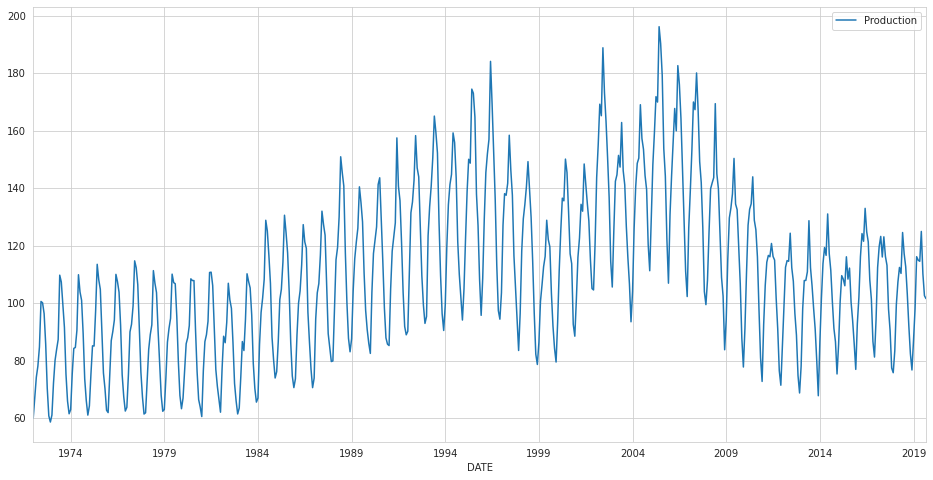

In [7]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [9]:
len(df)

573

In [225]:
test_size= 24

In [226]:
test_ind = len(df)- test_size
test_ind

549

In [227]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [228]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [229]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


## Scaling

In [230]:
from sklearn.preprocessing import MinMaxScaler

In [231]:
scaler = MinMaxScaler()

In [232]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [233]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [236]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [237]:
len(generator)

537

In [238]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [239]:
X, y = generator[0]

In [240]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [242]:
train_scaled.shape

(549, 1)

In [243]:
n_features = train_scaled.shape[1]

In [244]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [245]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 12, 100)           40800     
                                                                 
 lstm_19 (LSTM)              (None, 50)                30200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [246]:
from tensorflow.keras.callbacks import EarlyStopping

In [247]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [248]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [249]:
len(validation_generator)

12

In [250]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
537/537 [==============================] - 12s 15ms/step - loss: 0.0240 - val_loss: 0.0019
Epoch 2/120
537/537 [==============================] - 8s 15ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 3/120
537/537 [==============================] - 8s 15ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 4/120
537/537 [==============================] - 8s 14ms/step - loss: 0.0045 - val_loss: 0.0031
Epoch 5/120
537/537 [==============================] - 8s 15ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 6/120
537/537 [==============================] - 8s 15ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 7/120
537/537 [==============================] - 8s 15ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 8/120
537/537 [==============================] - 7s 13ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 9/120
537/537 [==============================] - 8s 14ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 10/120
537/537 [==============================] - 7s 14ms/step - loss: 0.00

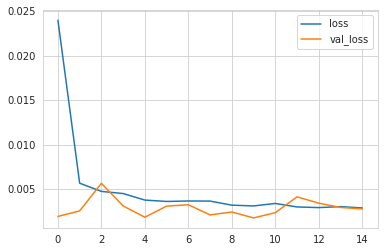

In [251]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [252]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [253]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [254]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [255]:
predictions_scaled

[array([0.24666558], dtype=float32),
 array([0.23702882], dtype=float32),
 array([0.2686525], dtype=float32),
 array([0.3212899], dtype=float32),
 array([0.37252107], dtype=float32),
 array([0.4111312], dtype=float32),
 array([0.43396226], dtype=float32),
 array([0.43743056], dtype=float32),
 array([0.4209259], dtype=float32),
 array([0.38079655], dtype=float32),
 array([0.32939878], dtype=float32),
 array([0.28284386], dtype=float32)]

In [256]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.4867015300840978 
mae: 0.07058609878507953 
mse: 0.006401159811644859 
rmse: 0.08000724849440118


### Inverse Transformation and Comparing

In [257]:
predictions = scaler.inverse_transform(predictions_scaled)

In [258]:
compare = test[:12]

In [259]:
compare['Predictions'] = predictions

In [46]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,89.217
2017-11-01,77.438,86.419
2017-12-01,75.812,91.554
2018-01-01,83.434,101.620
2018-02-01,99.490,111.205
2018-03-01,107.315,118.262
2018-04-01,112.431,123.020
2018-05-01,110.354,125.060
2018-06-01,124.584,123.632


## with "relu" activation function

In [260]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [261]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 12, 100)           40800     
                                                                 
 lstm_21 (LSTM)              (None, 50)                30200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [262]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
537/537 [==============================] - 9s 12ms/step - loss: 0.0275 - val_loss: 0.0030
Epoch 2/120
537/537 [==============================] - 6s 11ms/step - loss: 0.0095 - val_loss: 0.0127
Epoch 3/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0074 - val_loss: 0.0099
Epoch 4/120
537/537 [==============================] - 6s 11ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 5/120
537/537 [==============================] - 6s 11ms/step - loss: 0.0066 - val_loss: 0.0020
Epoch 6/120
537/537 [==============================] - 6s 11ms/step - loss: 0.0056 - val_loss: 0.0023
Epoch 7/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 8/120
537/537 [==============================] - 6s 11ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 9/120
537/537 [==============================] - 6s 11ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 10/120
537/537 [==============================] - 6s 11ms/step - loss: 0.004

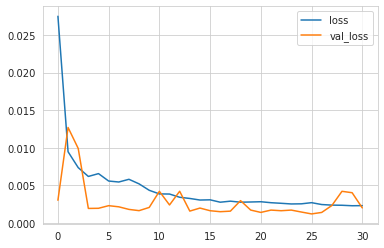

In [263]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [264]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [265]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [266]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5334202807826075 
mae: 0.06592212489338657 
mse: 0.005818547146794032 
rmse: 0.0762794018513126


### Inverse Transformation and Comparing

In [267]:
predictions = scaler.inverse_transform(predictions_scaled)

In [268]:
compare = test[:12]

In [269]:
compare['Predictions'] = predictions

In [270]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,92.221
2017-11-01,77.438,86.035
2017-12-01,75.812,86.111
2018-01-01,83.434,96.786
2018-02-01,99.490,110.760
2018-03-01,107.315,120.595
2018-04-01,112.431,127.128
2018-05-01,110.354,127.814
2018-06-01,124.584,124.811


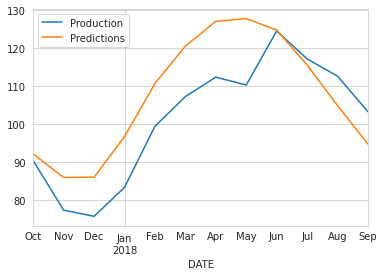

In [271]:
compare.plot()

In [274]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.5334202807826078 
mae: 9.06520849037667 
mse: 110.02914951474473 
rmse: 10.489478038241213


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [275]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [276]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [277]:
len(df)

573

In [278]:
len(generator)

561

In [279]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 12s 13ms/step - loss: 0.0171
Epoch 2/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0048
Epoch 3/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0048
Epoch 4/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0044
Epoch 5/15
561/561 [==============================] - 8s 13ms/step - loss: 0.0038
Epoch 6/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0034
Epoch 7/15
561/561 [==============================] - 8s 14ms/step - loss: 0.0037
Epoch 8/15
561/561 [==============================] - 11s 20ms/step - loss: 0.0033
Epoch 9/15
561/561 [==============================] - 15s 26ms/step - loss: 0.0032
Epoch 10/15
561/561 [==============================] - 11s 19ms/step - loss: 0.0033
Epoch 11/15
561/561 [==============================] - 12s 22ms/step - loss: 0.0030
Epoch 12/15
561/561 [==============================] - 10s 19ms/step - loss: 0.0029
Epoch 1

In [280]:
scaled_full_data.shape

(573, 1)

In [ ]:
scaled_full_data[-length:].shape

In [282]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [283]:
forecast = scaler.inverse_transform(forecast)

In [284]:
forecast

array([[ 86.97290979],
       [ 77.43384902],
       [ 77.66664508],
       [ 84.1734802 ],
       [ 92.21455464],
       [ 98.87502435],
       [103.54039198],
       [106.32191229],
       [106.35213267],
       [102.2953937 ],
       [ 95.10776821],
       [ 86.0638806 ]])

In [285]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [286]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [287]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [288]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [289]:
forecast_df

,Forecast
2019-10-01,86.973
2019-11-01,77.434
2019-12-01,77.667
2020-01-01,84.173
2020-02-01,92.215
2020-03-01,98.875
2020-04-01,103.540
2020-05-01,106.322
2020-06-01,106.352
2020-07-01,102.295


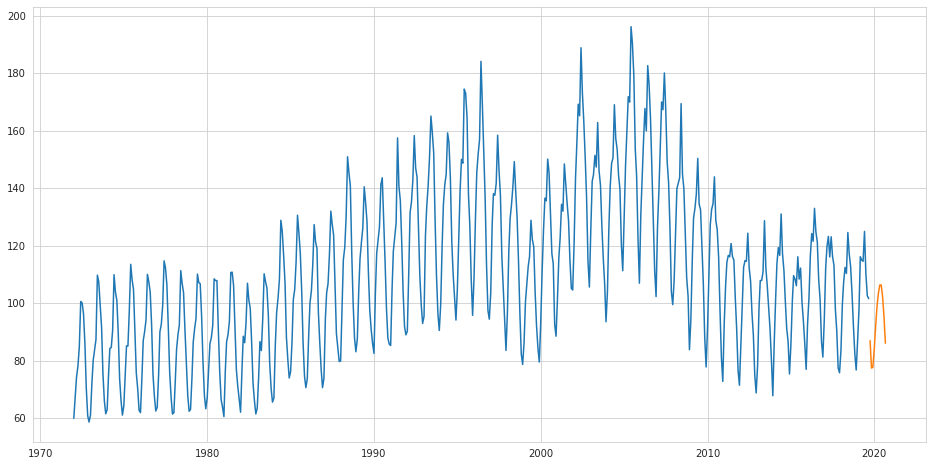

In [291]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

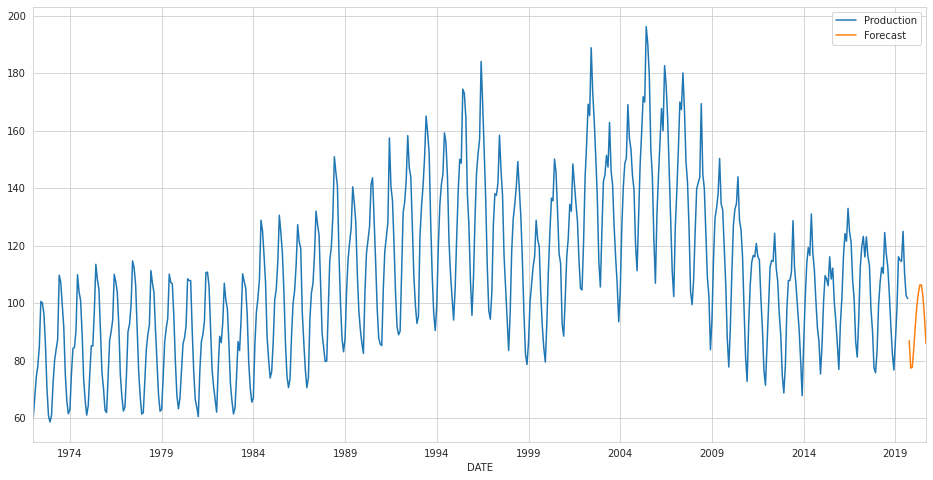

In [292]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(584.0, 609.0)

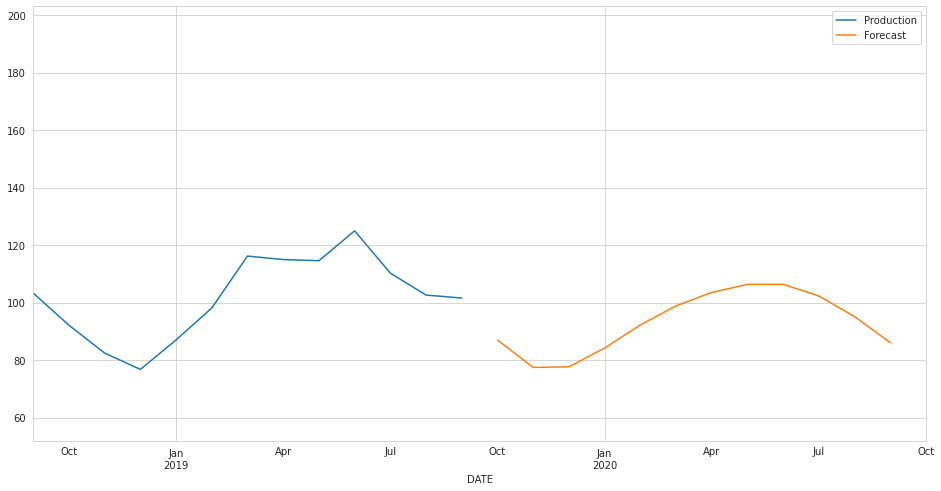

In [294]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-09-01', '2020-10-01')

In [295]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)

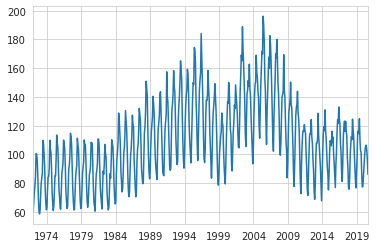

In [296]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___